#Covid Analysis and Prediction

COVID-19 cases at daily level is present in covid_19_india.csv file

Statewise testing details in StatewiseTestingDetails.csv file

Importing necessary libraries

In [32]:
import numpy as np
import pandas as pd

# Read Data from the Dataset

In [33]:
state_df = pd.read_csv('StatewiseTestingDetails.csv')
country_df = pd.read_csv('covid_19_india.csv')


In [34]:
state_df[state_df['State']=='Maharashtra'].head()

,Date,State,TotalSamples,Negative,Positive
7065,2020-04-05,Maharashtra,16008.0,14837,NaN
7066,2020-04-06,Maharashtra,17563.0,15808,868.0
7067,2020-04-07,Maharashtra,20877.0,19290,1018.0
7068,2020-04-09,Maharashtra,20877.0,19290,868.0
7069,2020-04-10,Maharashtra,30000.0,28865,1135.0


In [35]:
country_df[((country_df['Date']=='2020-04-04')&(country_df['State/UnionTerritory']=='Maharashtra'))]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
636,637,2020-04-04,6:00 PM,Maharashtra,-,-,42,24,490


Statewise Testing Details and Covid_19 India.csv has similar data, only difference that can be seen is that the total positive count placed in next dat count in Covid_19_India.csv.

In [36]:
print("Minimum date :",country_df['Date'].min())
print("Maximum date :",country_df['Date'].max())

Minimum date : 2020-01-30
Maximum date : 2021-05-08


We have records starting from 30 Jan 2020 to 8th May 2021.

Copying the country_df to df for smooth use

In [37]:
df=country_df.copy()

# Checking for Null Values

In [38]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

There is no null value to handle.





Checking the datatype of the columns

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14690 entries, 0 to 14689
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       14690 non-null  int64 
 1   Date                      14690 non-null  object
 2   Time                      14690 non-null  object
 3   State/UnionTerritory      14690 non-null  object
 4   ConfirmedIndianNational   14690 non-null  object
 5   ConfirmedForeignNational  14690 non-null  object
 6   Cured                     14690 non-null  int64 
 7   Deaths                    14690 non-null  int64 
 8   Confirmed                 14690 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.0+ MB


Date, Time, State/UnitonTerritory ConfirmedIndianNational, ConfirmedForignNational are in Categorical value.




In [40]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


Converting the Date feature to Date & Time Datatype

Time is not required as it doesnt make much difference in prediction

Renaming State/UnionTerritory to States for easy reference

In [41]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

df.drop(['Time'],axis=1, inplace=True)

df.rename(columns={'State/UnionTerritory':'States'}, inplace=True)

Making a new column Active_cases from the dataset

In [42]:
df['Active_cases']=df['Confirmed']-(df['Cured']+df['Deaths'])

In [43]:
df[df['States']=='Tamil Nadu'].tail()

,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases
14540,14541,2021-05-04,Tamil Nadu,-,-,1090338,14468,1228064,123258
14576,14577,2021-05-05,Tamil Nadu,-,-,1109450,14612,1249292,125230
14612,14613,2021-05-06,Tamil Nadu,-,-,1129512,14779,1272602,128311
14648,14649,2021-05-07,Tamil Nadu,-,-,1151058,14974,1297500,131468
14684,14685,2021-05-08,Tamil Nadu,-,-,1173439,15171,1323965,135355


# EDA (Exploratory Data Analysis) & Future Engineering

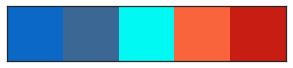

In [44]:
import matplotlib.pyplot as plt
import matplotlib.dates as mtd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

colors=['#0C68C7','#3A6794','#00FAF3','#FA643C','#C71D12']
sns.set(palette=colors, style='white')

sns.palplot(colors)

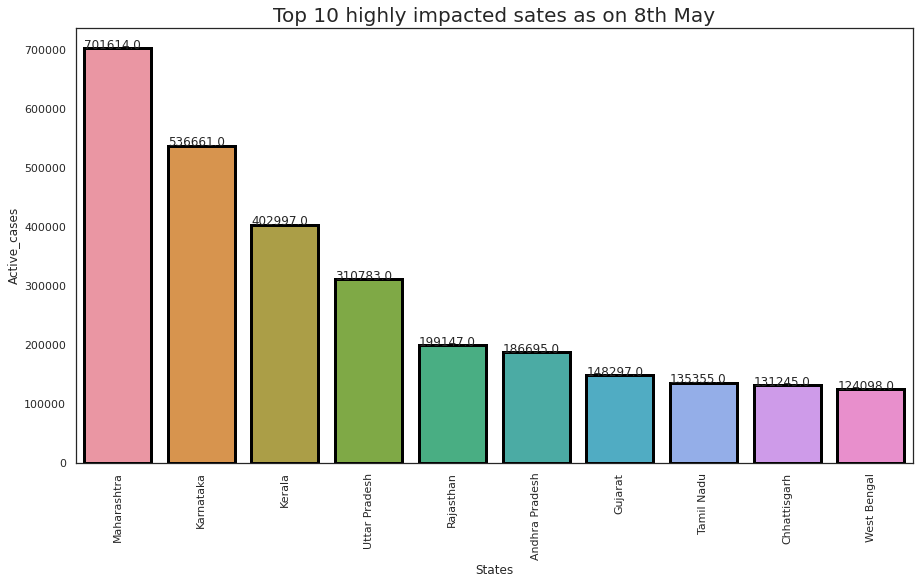

In [45]:
top_10=df.groupby(by='States').max()[['Active_cases','Date']].sort_values(by=['Active_cases'],ascending=False).reset_index()

fig=plt.figure(figsize=(15,8))
plt.title("Top 10 highly impacted sates as on 8th May", size=20)
ax=sns.barplot(data=top_10.iloc[:10],y='Active_cases',x='States', linewidth=3, edgecolor='black')
ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=90)

for i in ax.patches:
  ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())

***As on May 8th Data, Maharastra has highest number active cases and comes the Karnataka, Kerala, Utttar Pradesh & Rajasthan**

Text(0.5, 1.0, 'Active cases by States')

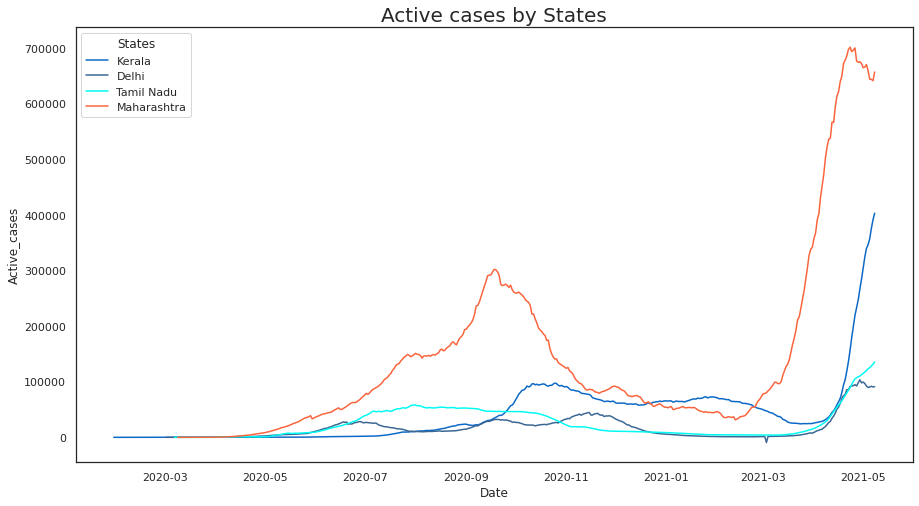

In [46]:
fig=plt.figure(figsize=(15,8))

ax=sns.lineplot(data=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])],x='Date',y='Active_cases',hue='States')
ax.set_title("Active cases by States", size=20)

**Almost all states shares the same trend in Covid cases, as mentioned in the above chart, Maharastra has highes number cases since july 2020.**

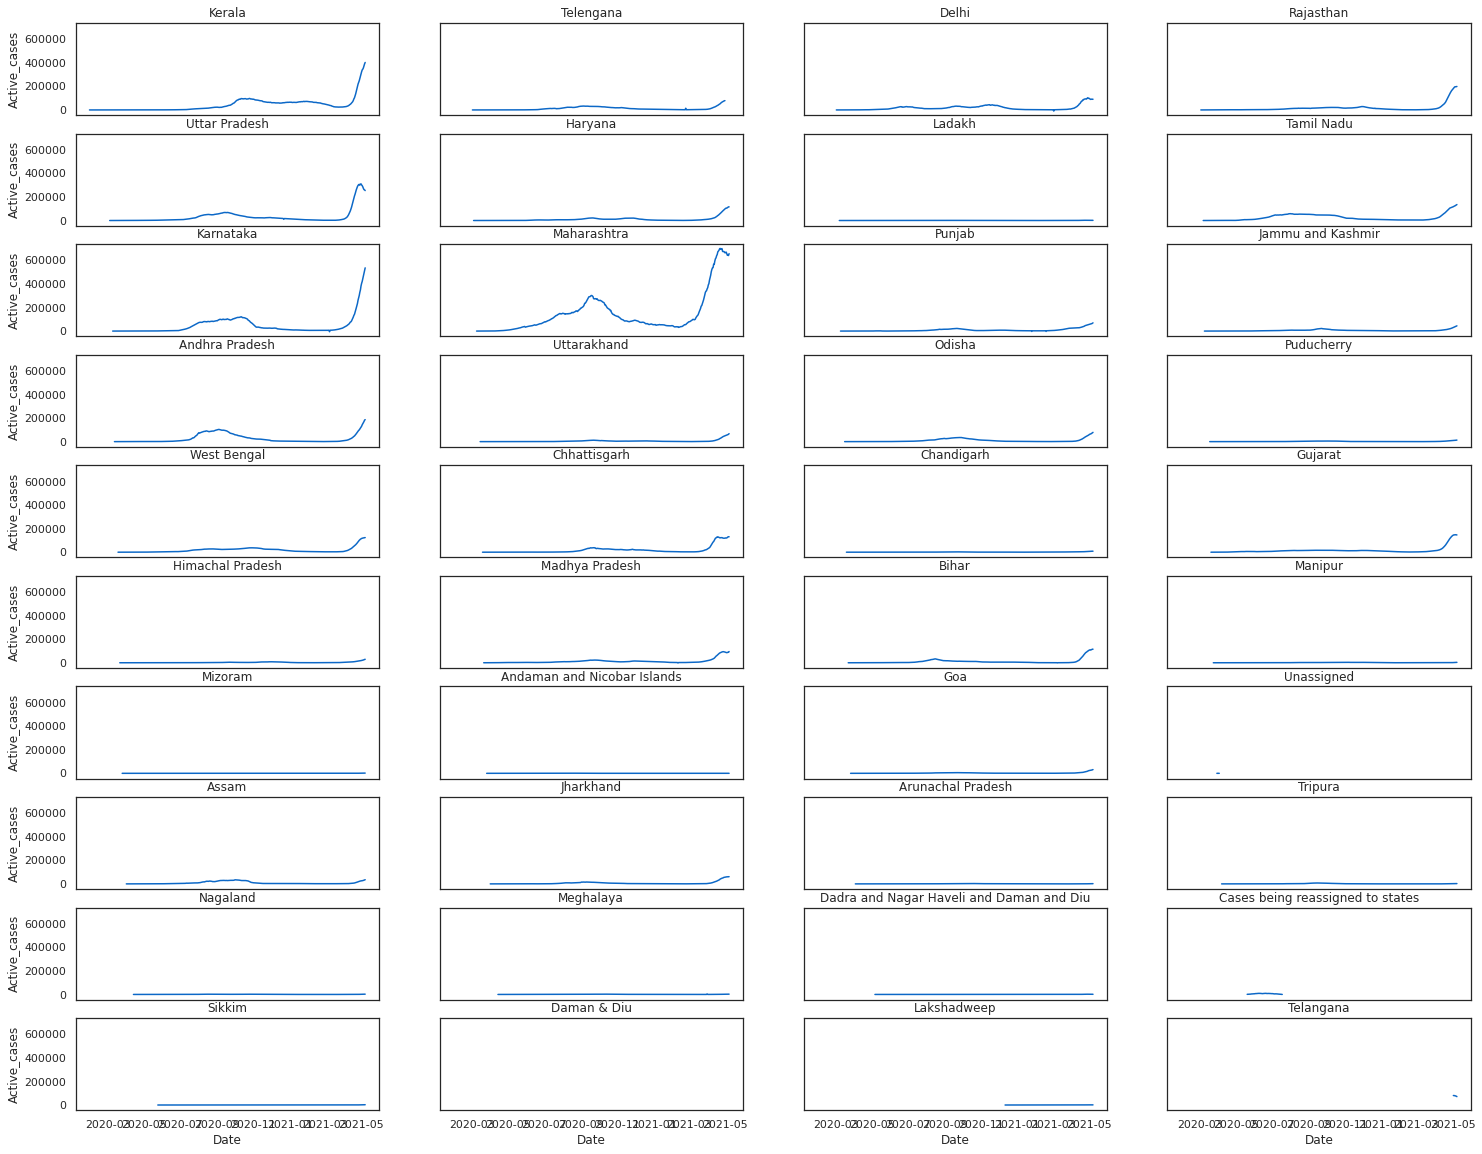

In [47]:
fig, ax=plt.subplots(nrows=10, ncols=4, figsize=[25,20], sharex=True, sharey=True)
ax=ax.flatten()

for i,s in enumerate(df['States'].unique()):
  data1=df[df['States']==s][['Date','Active_cases']]
  sns.lineplot(data=data1, x='Date',y='Active_cases', ax=ax[i])
  ax[i].set_title(s)

Text(0.5, 1.0, 'Bar plot for sample states')

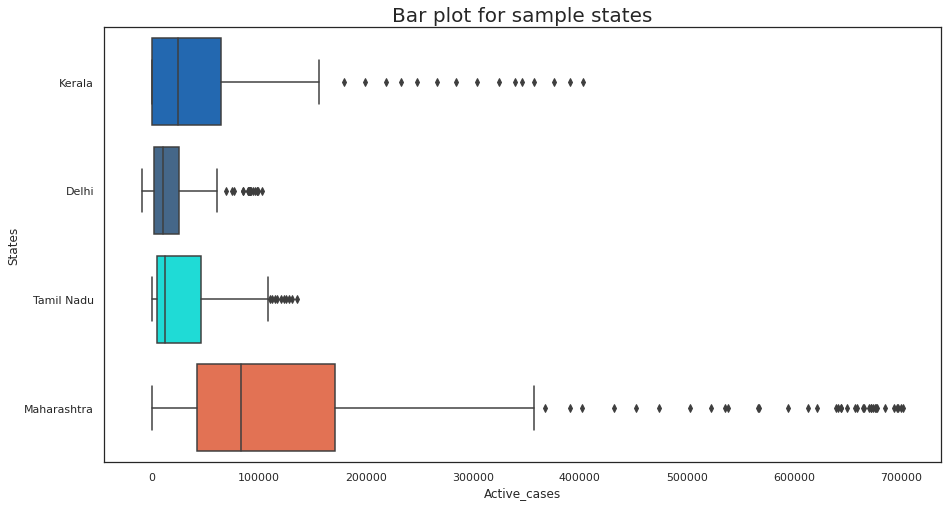

In [48]:
fig=plt.figure(figsize=(15,8))
sns.boxplot(data=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])],x='Active_cases',y='States')
plt.title("Bar plot for sample states" ,size=20)

In [49]:
median_states=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])]
median_states.groupby(by=['States']).median().style.bar(['Active_cases'])

,Sno,Cured,Deaths,Confirmed,Active_cases
States,,,,,
Delhi,6955.000000,257224.000000,5472.000000,287930.000000,11068.000000
Kerala,6403.000000,87345.000000,489.000000,122214.000000,24892.000000
Maharashtra,7088.500000,1188083.500000,38894.500000,1473200.000000,83433.500000
Tamil Nadu,7063.500000,572438.000000,9881.500000,627899.500000,12145.500000


***Observation:***
1. Maharastra - Most of the times Active cases stays between 50000, 190000 range and the range went upto 35000+. Median is around 83K cases
2. Kerala - Active cases ranging from 0 to less than 100000. Median is around 40. Median value is around 24K
3. Tamilnadu - Avtive cases in Tamilnadu ranging less than 50,000. Median is around 12K

Is it because of high rate for cure/deaths?. lets check the same

Text(0.5, 1.0, 'Bar plot for sample states')

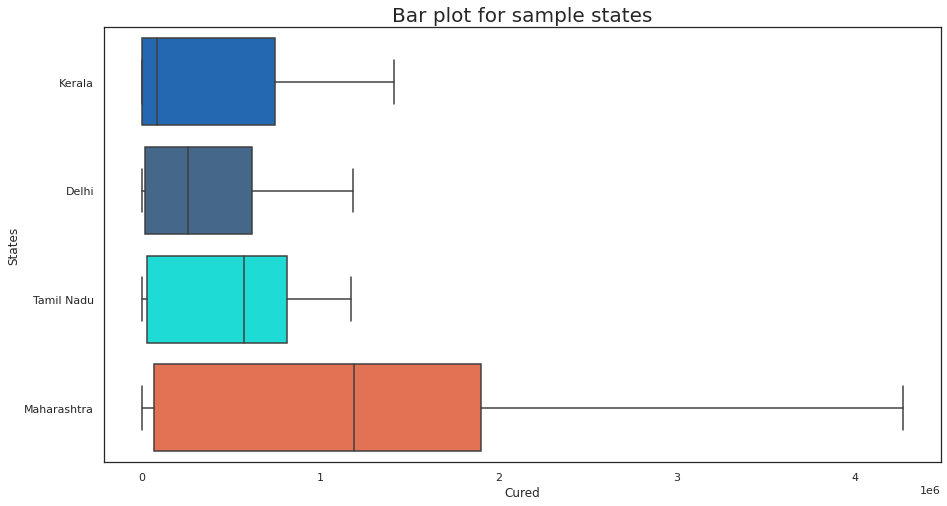

In [50]:
fig=plt.figure(figsize=(15,8))
sns.boxplot(data=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])],x='Cured',y='States')
plt.title("Bar plot for sample states" ,size=20)

In [51]:
median_states.groupby(by=['States']).median().style.bar(['Cured'])

,Sno,Cured,Deaths,Confirmed,Active_cases
States,,,,,
Delhi,6955.000000,257224.000000,5472.000000,287930.000000,11068.000000
Kerala,6403.000000,87345.000000,489.000000,122214.000000,24892.000000
Maharashtra,7088.500000,1188083.500000,38894.500000,1473200.000000,83433.500000
Tamil Nadu,7063.500000,572438.000000,9881.500000,627899.500000,12145.500000


**Observation**

1. Maharastra - has high range of cured value as well. 
2. Kerala - is in 3rd place for cured count
3. Tamilnadu - is in 2nd place in the sample in terms of cure.  

But, we can't conclude the rate by count. We will do some testing

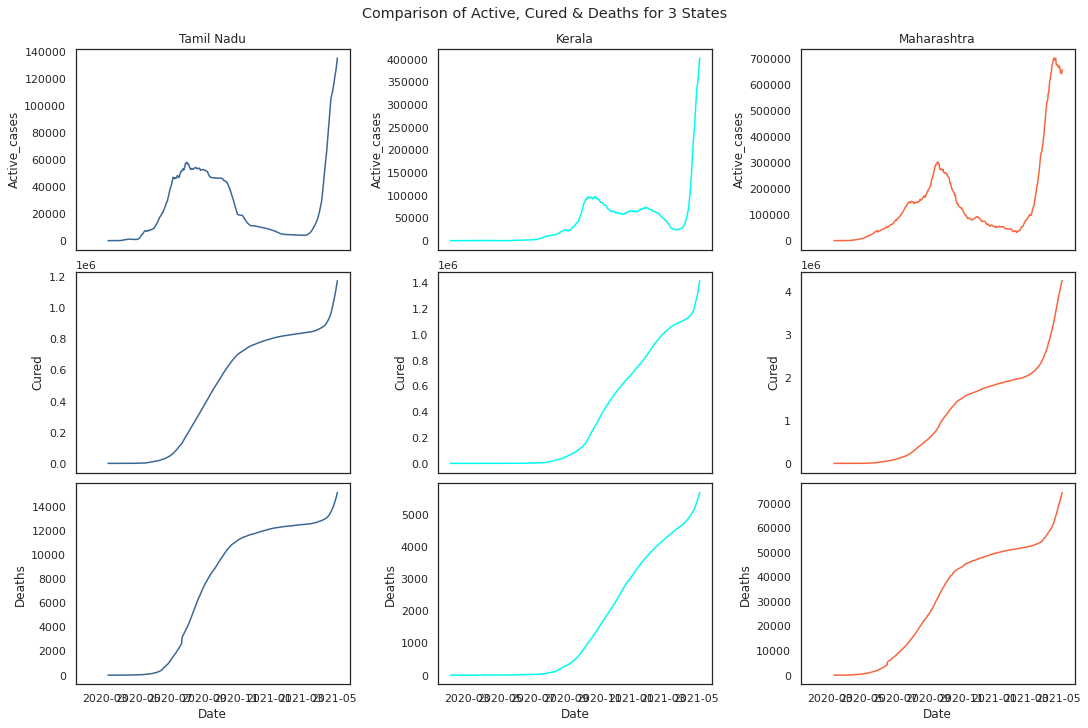

In [52]:
states=['Kerala', 'Tamil Nadu', 'Maharashtra']
tn=df[df['States']=='Tamil Nadu']
kl=df[df['States']=='Kerala']
mh=df[df['States']=='Maharashtra']


fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(15,10), squeeze=False, sharex=True, sharey=False, constrained_layout=True )
plt.suptitle("Comparison of Active, Cured & Deaths for 3 States")

sns.lineplot(data=tn, x='Date',y='Active_cases', ax=ax[0,0], color=colors[1])
ax[0,0].set_title("Tamil Nadu")
sns.lineplot(data=tn, x='Date',y='Cured', ax=ax[1,0], color=colors[1])
sns.lineplot(data=tn, x='Date',y='Deaths', ax=ax[2,0], color=colors[1])
    
sns.lineplot(data=kl, x='Date',y='Active_cases', ax=ax[0,1], color=colors[2])
ax[0,1].set_title("Kerala")
sns.lineplot(data=kl, x='Date',y='Cured', ax=ax[1,1], color=colors[2])
sns.lineplot(data=kl, x='Date',y='Deaths', ax=ax[2,1], color=colors[2])

sns.lineplot(data=mh, x='Date',y='Active_cases', ax=ax[0,2], color=colors[3])
ax[0,2].set_title("Maharashtra")
sns.lineplot(data=mh, x='Date',y='Cured', ax=ax[1,2], color=colors[3])
sns.lineplot(data=mh, x='Date',y='Deaths', ax=ax[2,2], color=colors[3])

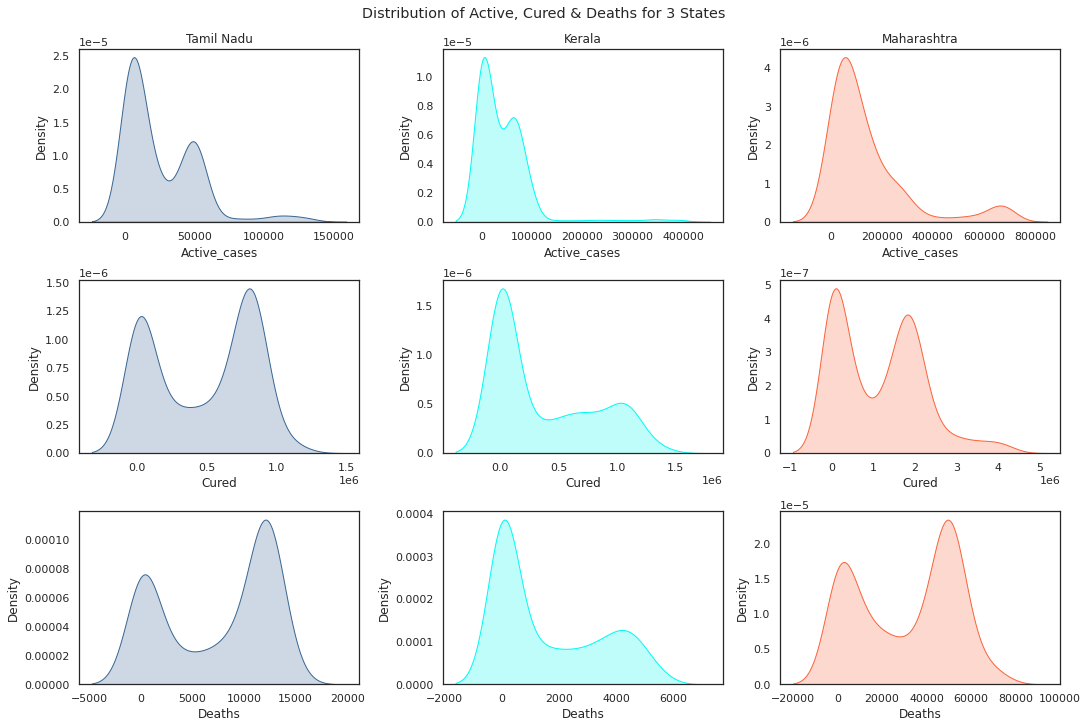

In [53]:
states=['Kerala', 'Tamil Nadu', 'Maharashtra']
tn=df[df['States']=='Tamil Nadu']
kl=df[df['States']=='Kerala']
mh=df[df['States']=='Maharashtra']

fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(15,10), squeeze=False, sharex=False, sharey=False, constrained_layout=True )
plt.suptitle("Distribution of Active, Cured & Deaths for 3 States")
    
sns.kdeplot(data=tn['Active_cases'],ax=ax[0,0],color=colors[1], fill=True)
ax[0,0].set_title("Tamil Nadu")
sns.kdeplot(data=tn['Cured'],  ax=ax[1,0],color=colors[1],fill=True)
sns.kdeplot(data=tn['Deaths'], ax=ax[2,0], color=colors[1],fill=True)

sns.kdeplot(data=kl['Active_cases'], ax=ax[0,1], color=colors[2],fill=True)
ax[0,1].set_title("Kerala")
sns.kdeplot(data=kl['Cured'], ax=ax[1,1], color=colors[2],fill=True)
sns.kdeplot(data=kl['Deaths'], ax=ax[2,1], color=colors[2],fill=True)

sns.kdeplot(data=mh['Active_cases'], ax=ax[0,2], color=colors[3],fill=True)
ax[0,2].set_title("Maharashtra")
sns.kdeplot(data=mh['Cured'], ax=ax[1,2], color=colors[3],fill=True)
sns.kdeplot(data=mh['Deaths'], ax=ax[2,2], color=colors[3],fill=True)

# Statistical testing

## Cure Rate Testing

In [54]:
tn=df[df['States']=='Tamil Nadu']['Cured']
mh=df[df['States']=='Maharashtra']['Cured']
kl=df[df['States']=='Kerala']['Cured']

from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

## Null Hyposthesis
H0 - mean of states cure rate are significant

H1 - mean of states cure rate are not significant

Significant rate: 0.05

In [55]:
st,p_value=ttest_ind(tn,kl)
if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Tamil Nadu','Kerala'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Tamil Nadu','Kerala'))

st,p_value=ttest_ind(tn,mh)
if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Tamil Nadu','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Tamil Nadu','Maharashtra'))

st,p_value=ttest_ind(kl,mh)
if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Kerala','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Kerala','Maharashtra'))

Both states Tamil Nadu & Kerala have significant difference in Cure rate
Both states Tamil Nadu & Maharashtra have significant difference in Cure rate
Both states Kerala & Maharashtra have significant difference in Cure rate


### But, the difference is because of high active cases? Lets us do another test

## Proportion Test

In [56]:
tn_cured = df[df['States']=='Tamil Nadu']['Cured'].max()
mh_cured=df[df['States']=='Maharashtra']['Cured'].max()
kl_cured=df[df['States']=='Kerala']['Cured'].max()

tn_active = df[df['States']=='Tamil Nadu']['Confirmed'].max()
mh_active=df[df['States']=='Maharashtra']['Confirmed'].max()
kl_active=df[df['States']=='Kerala']['Confirmed'].max()

In [57]:
print([tn_cured, mh_cured] , [tn_active, mh_active])
print(f' Proportion of cured cases in Tamil Nadu, Maharastra = {round(tn_cured/tn_active,2)}%, {round(mh_cured/mh_active,2)}% respectively \n')

print([tn_cured, kl_cured] , [tn_active, kl_active])
print(f' Proportion of cured cases in Tamil Nadu, Kerala = {round(tn_cured/tn_active,2)}%, {round(kl_cured/kl_active,2)}% respectively \n')

print([mh_cured, kl_cured] , [mh_active, kl_active])
print(f' Proportion of cured cases in Tamil Nadu, Kerala = {round(mh_cured/mh_active,2)}%, {round(kl_cured/kl_active,2)}% respectively \n')

[1173439, 4265326] [1323965, 4996758]
 Proportion of cured cases in Tamil Nadu, Maharastra = 0.89%, 0.85% respectively 

[1173439, 1416177] [1323965, 1824856]
 Proportion of cured cases in Tamil Nadu, Kerala = 0.89%, 0.78% respectively 

[4265326, 1416177] [4996758, 1824856]
 Proportion of cured cases in Tamil Nadu, Kerala = 0.85%, 0.78% respectively 



In [58]:
stat, p_value = proportions_ztest([tn_cured, mh_cured] , [tn_active, mh_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Tamil Nadu','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Tamil Nadu','Maharashtra'))

stat, p_value = proportions_ztest([tn_cured, kl_cured] , [tn_active, kl_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Tamil Nadu','Kerala'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Tamil Nadu','Kerala'))

stat, p_value = proportions_ztest([kl_cured, mh_cured] , [kl_active, mh_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Kerala','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Kerala','Maharashtra'))


Both states Tamil Nadu & Maharashtra have significant difference in Cure rate
Both states Tamil Nadu & Kerala have significant difference in Cure rate
Both states Kerala & Maharashtra have significant difference in Cure rate


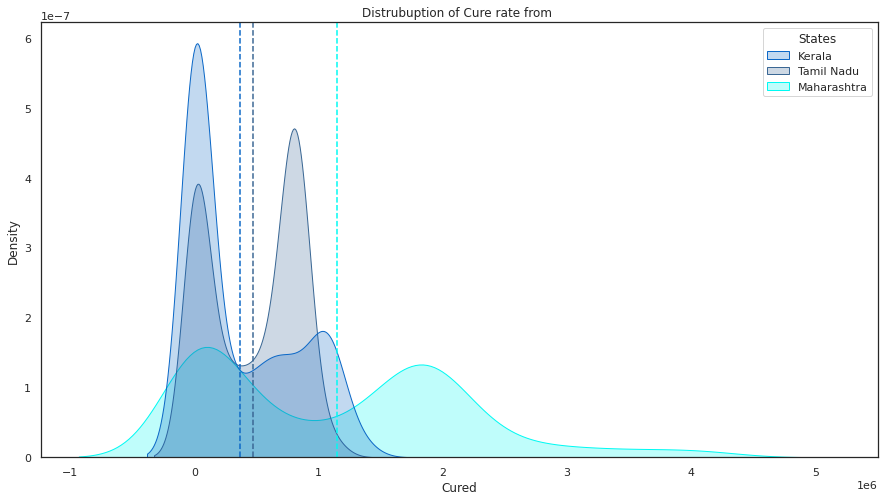

In [59]:
from scipy.stats import norm

fig=plt.figure(figsize=(15,8))
plt.title("Distrubuption of Cure rate from ")

ax=sns.kdeplot(data=median_states[median_states['States'].isin(['Tamil Nadu','Maharashtra','Kerala'])],x='Cured', hue='States', fill=True)
ax.axvline(median_states[median_states['States']=='Kerala']['Cured'].mean(), ls='--', c=colors[0])
ax.axvline(median_states[median_states['States']=='Tamil Nadu']['Cured'].mean(), ls='--', c=colors[1])
ax.axvline(median_states[median_states['States']=='Maharashtra']['Cured'].mean(), ls='--', c=colors[2])
    

In [60]:
#lets take mean impacted vs mean cured
tn_cured = df[df['States']=='Tamil Nadu']['Deaths'].max()
mh_cured=df[df['States']=='Maharashtra']['Deaths'].max()
kl_cured=df[df['States']=='Kerala']['Deaths'].max()

tn_active = df[df['States']=='Tamil Nadu']['Confirmed'].max()
mh_active=df[df['States']=='Maharashtra']['Confirmed'].max()
kl_active=df[df['States']=='Kerala']['Confirmed'].max()

print([tn_cured, mh_cured] , [tn_active, mh_active])
print(f' Proportion of Death cases in Tamil Nadu, Maharastra = {round(tn_cured/tn_active,2)}%, {round(mh_cured/mh_active,2)}% respectively \n')

print([tn_cured, kl_cured] , [tn_active, kl_active])
print(f' Proportion of Death cases in Tamil Nadu, Kerala = {round(tn_cured/tn_active,2)}%, {round(kl_cured/kl_active,2)}% respectively \n')

print([mh_cured, kl_cured] , [mh_active, kl_active])
print(f' Proportion of Death cases in Tamil Nadu, Kerala = {round(mh_cured/mh_active,2)}%, {round(kl_cured/kl_active,2)}% respectively \n')


stat, p_value = proportions_ztest([tn_cured, mh_cured] , [tn_active, mh_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Death rate".format('Tamil Nadu','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Death rate".format('Tamil Nadu','Maharashtra'))

stat, p_value = proportions_ztest([tn_cured, kl_cured] , [tn_active, kl_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Death rate".format('Tamil Nadu','Kerala'))
else:
    print("Both states {} & {} have no significant difference in Death rate".format('Tamil Nadu','Kerala'))

stat, p_value = proportions_ztest([kl_cured, mh_cured] , [kl_active, mh_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Death rate".format('Kerala','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Death rate".format('Kerala','Maharashtra'))


[15171, 74413] [1323965, 4996758]
 Proportion of Death cases in Tamil Nadu, Maharastra = 0.01%, 0.01% respectively 

[15171, 5682] [1323965, 1824856]
 Proportion of Death cases in Tamil Nadu, Kerala = 0.01%, 0.0% respectively 

[74413, 5682] [4996758, 1824856]
 Proportion of Death cases in Tamil Nadu, Kerala = 0.01%, 0.0% respectively 

Both states Tamil Nadu & Maharashtra have significant difference in Death rate
Both states Tamil Nadu & Kerala have significant difference in Death rate
Both states Kerala & Maharashtra have significant difference in Death rate


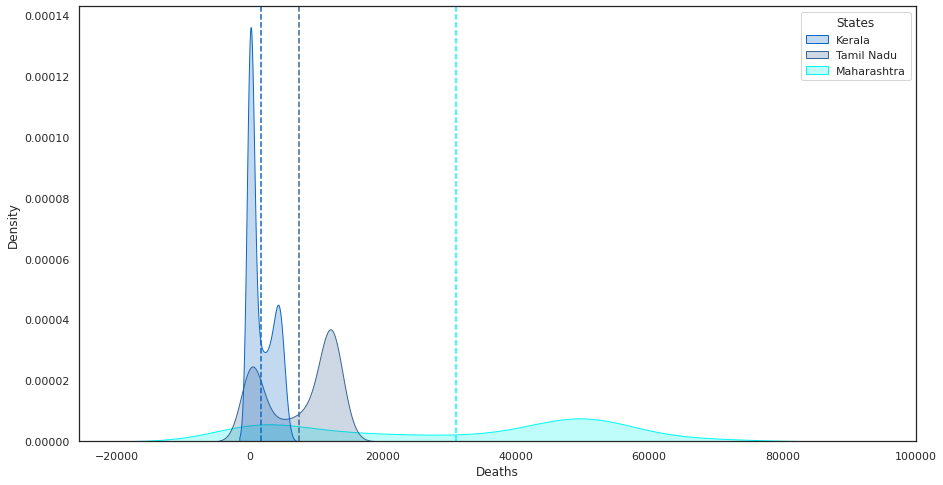

In [61]:
from scipy.stats import norm

fig=plt.figure(figsize=(15,8))

ax=sns.kdeplot(data=median_states[median_states['States'].isin(['Tamil Nadu','Maharashtra','Kerala'])],x='Deaths', hue='States', fill=True)

ax.axvline(median_states[median_states['States']=='Kerala']['Deaths'].mean(), ls='--', c=colors[0])
ax.axvline(median_states[median_states['States']=='Tamil Nadu']['Deaths'].mean(), ls='--', c=colors[1])
ax.axvline(median_states[median_states['States']=='Maharashtra']['Deaths'].mean(), ls='--', c=colors[2])
    

***All 3 states Kerala, Tamil Nadu & Maharashtra have significant difference in Cure rate & Death rated compared to over all impact***

Text(0.5, 0.98, '% of active cases in India by States as on 8th May 2021')

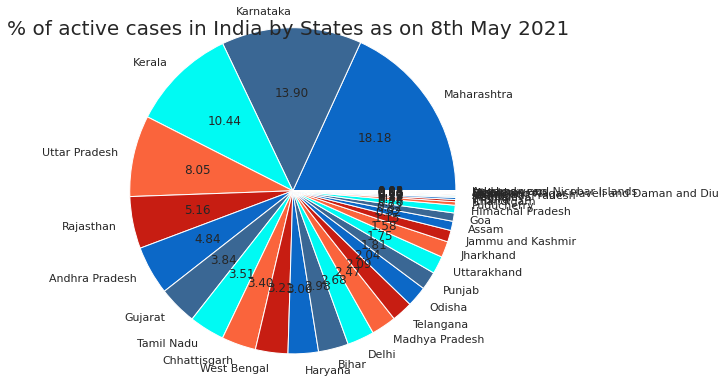

In [62]:
fig=plt.figure(figsize=(5,5))
plt.pie(x=top_10[top_10['Date']=='2021-05-08 00:00:00']['Active_cases'], labels=top_10[top_10['Date']=='2021-05-08 00:00:00']['States'], autopct='%.2f',radius=1.5);
plt.suptitle("% of active cases in India by States as on 8th May 2021",size=20)